In [1]:
# Import libraries
import json
import os
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# get current directory
dir = os.path.dirname(os.path.abspath('__file__'))

In [3]:
# Load review data 
# Raw data in the format of {} {} {} seperated by lines

# get file path (generalize for different OS) for reviews
filename = os.path.join(dir, 'raw_data','review.json')

# create a list of reviews
with open(filename, encoding="utf8", mode='r') as file:
    reviews = [json.loads(line) for line in file]

# create a pandas data frame from review data 
reviews_df = pd.DataFrame(reviews)

In [4]:
# review data exploration 
print(reviews_df.shape )
print(reviews_df.info() )
print(reviews_df.describe() )

# check for null values
print( reviews_df.isnull().sum().sum() )

(4736897, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736897 entries, 0 to 4736896
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 325.3+ MB
None
               cool         funny         stars        useful
count  4.736897e+06  4.736897e+06  4.736897e+06  4.736897e+06
mean   5.096600e-01  4.029171e-01  3.724048e+00  9.882921e-01
std    1.960374e+00  1.721954e+00  1.421104e+00  2.600021e+00
min    0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  3.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  4.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00  5.000000e+00  1.000000e+00
max    5.130000e+02  6.310000e+02  5.000000e+00  1.125000e+03
0


In [5]:
# convert date to a datetime - note stars will be kept as an integer vs category
reviews_df['date'] = pd.to_datetime(reviews_df['date'], format='%Y-%m-%d')
# outcome: no null values

In [6]:
# check output of first 50 
print(reviews_df.head(50) )

# outcome: some reviews look like accommodation and other non-restaurant business (e.g. first 15) 
# and some reviews are in a different language (e.g. index 4 and 5) and 

               business_id  cool       date  funny               review_id  \
0   uYHaNptLzDLoV_JZ_MuzUA     0 2016-07-12      0  VfBHSwC5Vz_pbFluy07i9Q   
1   uYHaNptLzDLoV_JZ_MuzUA     0 2016-10-02      0  3zRpneRKDsOPq92tq7ybAA   
2   uYHaNptLzDLoV_JZ_MuzUA     0 2015-09-17      0  ne5WhI1jUFOcRn-b-gAzHA   
3   uYHaNptLzDLoV_JZ_MuzUA     0 2016-08-21      0  llmdwOgDReucVoWEry61Lw   
4   uYHaNptLzDLoV_JZ_MuzUA     0 2013-11-20      0  DuffS87NaSMDmIfluvT83g   
5   uYHaNptLzDLoV_JZ_MuzUA     0 2016-06-05      0  GvLmUkjUrOyFH8KFnmT1uw   
6   uYHaNptLzDLoV_JZ_MuzUA     0 2015-02-21      0  lGEl24NGj2HVBJrodeXcjg   
7   uYHaNptLzDLoV_JZ_MuzUA     0 2013-07-07      0  cUgvEy5wj7zYE68v1BzzVg   
8   uYHaNptLzDLoV_JZ_MuzUA     2 2013-04-27      0  FSB_BnvysBgH3JYrbFNcgw   
9   uYHaNptLzDLoV_JZ_MuzUA     0 2015-04-13      0  dhl3ZW9aAEX_T7_um5tfaQ   
10  uYHaNptLzDLoV_JZ_MuzUA     1 2016-11-08      1  JQJvnM3p-3eML05eKcTgiw   
11  uYHaNptLzDLoV_JZ_MuzUA     0 2015-07-27      0  6JF4WfHgwYrr

In [7]:
# Load in business data 

# get file path (generalize for different OS) for reviews
filename = os.path.join(dir, 'raw_data','business.json')

# create a list of reviews
with open(filename, encoding="utf8", mode='r') as file:
    businesses = [json.loads(line) for line in file]

# create a pandas data frame from review data 
businesses_df = pd.DataFrame(businesses)

In [8]:
# business data exploration 
print(businesses_df.shape )
print(businesses_df.info() )
print(businesses_df.describe() )

# check for null values
print( businesses_df.isnull().sum().sum() )
# outcome: 2 null values - one in lat, the other in long 

# check output
print(businesses_df.head() )

(156639, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156639 entries, 0 to 156638
Data columns (total 15 columns):
address         156639 non-null object
attributes      156639 non-null object
business_id     156639 non-null object
categories      156639 non-null object
city            156639 non-null object
hours           156639 non-null object
is_open         156639 non-null int64
latitude        156638 non-null float64
longitude       156638 non-null float64
name            156639 non-null object
neighborhood    156639 non-null object
postal_code     156639 non-null object
review_count    156639 non-null int64
stars           156639 non-null float64
state           156639 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 17.9+ MB
None
             is_open       latitude      longitude   review_count  \
count  156639.000000  156638.000000  156638.000000  156639.000000   
mean        0.844375      38.585033     -92.856485      30.238159   
std         0.

In [9]:
# drop columns - address, city, hours, is_open, neighborhood, postal_code, state, latitude, longitude
dropped_columns = ['address','city','hours', 'is_open','neighborhood','postal_code', 'state', 'latitude', 'longitude']
for column in dropped_columns:
    del businesses_df[column]

In [10]:
# Extract restaurants 
restaurants_df = businesses_df[ businesses_df['categories'].apply(lambda categories: any(pd.Series(categories).str.contains('Restaurants')) if len(categories)>0 else False)]
print( restaurants_df.shape )

(51613, 6)


In [11]:
# Merge both data frames
joint_df = pd.merge(reviews_df, restaurants_df, on='business_id', suffixes=['_review', '_business'])
print( joint_df.shape )
# Inner join reduced the total number of reviews from 4 736 897 to the 2 927 731 from restaurants 

(2927731, 14)


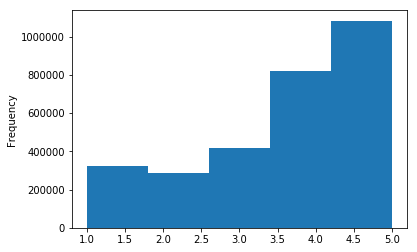

In [12]:
# histogram of review stars
joint_df['stars_review'].plot(kind='hist', bins=5)
plt.show()